In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

In [14]:
def anova(frame,qualitative,target_column):
    anv = pd.DataFrame()
    anv['feature'] = qualitative
    pvals = []
    for c in qualitative:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls][target_column].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

In [18]:
def spearman(frame, features,targe_column):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame[targe_column], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')

# Logistic Regression

## Data Type 1

### No Deck Predictions

### With Deck Predictions

In [54]:
data = pd.read_csv('./CV_LR_deck_data1.csv',index_col='Unnamed: 0')
data.head().columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_C', 'param_penalty', 'param_solver',
       'params', 'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split10_test_score', 'split10_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

In [55]:
data.drop(['mean_score_time','params','split0_test_score', 'split0_train_score',
       'split10_test_score', 'split10_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time'],axis=1,inplace=True)

In [56]:
numerical = [f for f in data.columns if data.dtypes[f] != 'object']
numerical.remove('mean_test_score')
categorical = [f for f in data.columns if data.dtypes[f] == 'object']

In [57]:
data.sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_C,param_penalty,param_solver,rank_test_score,std_test_score,std_train_score
6,0.007527,0.820426,0.824467,1.000,l1,liblinear,1,0.024243,0.002049
7,0.106512,0.820426,0.825028,1.000,l1,saga,1,0.026950,0.003271
34,0.105831,0.818182,0.825590,1000.000,l2,sag,3,0.029018,0.002944
11,0.106523,0.818182,0.825590,100.000,l1,saga,3,0.029018,0.002999
26,0.012458,0.818182,0.826039,10.000,l2,newton-cg,3,0.029018,0.002826
27,0.022709,0.818182,0.826039,10.000,l2,lbfgs,3,0.029018,0.002826
29,0.019673,0.818182,0.825702,100.000,l2,newton-cg,3,0.029018,0.003239
30,0.018623,0.818182,0.825702,100.000,l2,lbfgs,3,0.029018,0.003239
31,0.105675,0.818182,0.825702,100.000,l2,sag,3,0.029018,0.002986
13,0.105257,0.818182,0.825702,1000.000,l1,saga,3,0.029018,0.002986


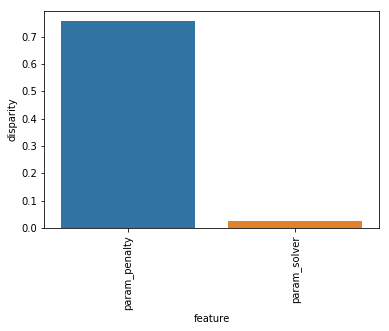

In [62]:
a = anova(data,categorical,'mean_test_score')
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

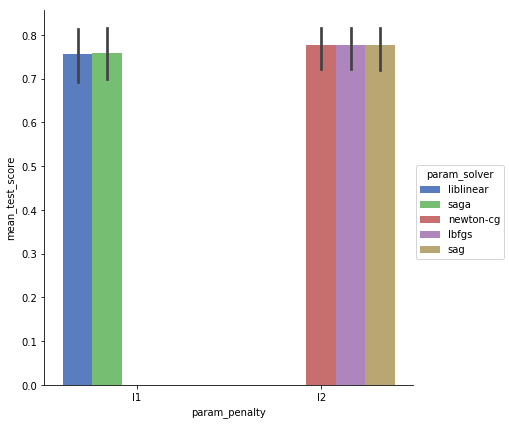

In [63]:
g = sns.factorplot(x="param_penalty", y="mean_test_score", hue="param_solver", data=data,
                   size=6, kind="bar", palette="muted")

In [64]:
data.groupby('param_penalty').mean()

,mean_fit_time,mean_test_score,mean_train_score,param_C,rank_test_score,std_test_score,std_train_score
param_penalty,,,,,,,
l1,0.067452,0.756614,0.761913,158.730143,13.928571,0.021916,0.003556
l2,0.043315,0.776762,0.784154,158.730143,15.238095,0.028700,0.003004


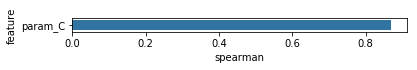

In [65]:
spearman(data,['param_C'],'mean_test_score')

## Data Type 2

### No Deck Predictions

### With Deck Predictions

In [259]:
data = pd.read_csv('./CV_LR_deck_data2.csv',index_col='Unnamed: 0')
data.head().columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_C', 'param_penalty', 'param_solver',
       'params', 'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split10_test_score', 'split10_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

In [260]:
data.drop(['mean_score_time','params','split0_test_score', 'split0_train_score',
       'split10_test_score', 'split10_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time'],axis=1,inplace=True)

In [261]:
numerical = [f for f in data.columns if data.dtypes[f] != 'object']
numerical.remove('mean_test_score')
categorical = [f for f in data.columns if data.dtypes[f] == 'object']

In [262]:
data.sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_C,param_penalty,param_solver,rank_test_score,std_test_score,std_train_score
24,0.018877,0.812570,0.816387,1.000,l2,lbfgs,1,0.028968,0.003717
23,0.011960,0.812570,0.816387,1.000,l2,newton-cg,1,0.028968,0.003717
25,0.106562,0.812570,0.816387,1.000,l2,sag,1,0.028968,0.003791
26,0.014714,0.811448,0.820764,10.000,l2,newton-cg,4,0.033454,0.003867
27,0.021646,0.811448,0.820876,10.000,l2,lbfgs,4,0.033454,0.003395
8,0.030918,0.811448,0.819978,10.000,l1,liblinear,4,0.030128,0.002335
11,0.108998,0.810325,0.820315,100.000,l1,saga,7,0.031994,0.003991
28,0.108939,0.810325,0.820427,10.000,l2,sag,7,0.031920,0.003635
13,0.107941,0.810325,0.820427,1000.000,l1,saga,7,0.031994,0.004094
30,0.019862,0.809203,0.820202,100.000,l2,lbfgs,10,0.027459,0.002430


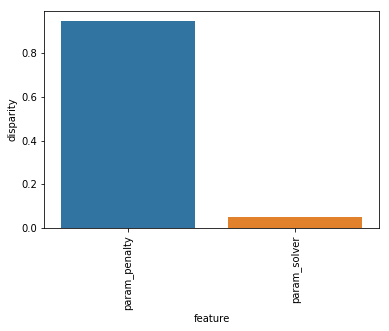

In [263]:
a = anova(data,categorical,'mean_test_score')
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

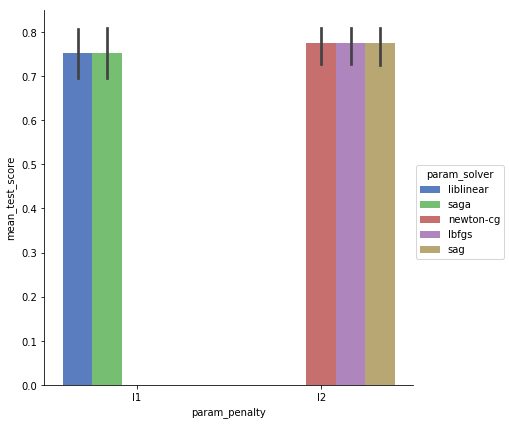

In [264]:
g = sns.factorplot(x="param_penalty", y="mean_test_score", hue="param_solver", data=data,
                   size=6, kind="bar", palette="muted")

In [265]:
data.groupby('param_penalty').mean()

,mean_fit_time,mean_test_score,mean_train_score,param_C,rank_test_score,std_test_score,std_train_score
param_penalty,,,,,,,
l1,0.071035,0.752445,0.758995,158.730143,19.214286,0.022315,0.003334
l2,0.045545,0.774411,0.782332,158.730143,15.523810,0.034491,0.004190


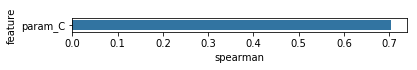

In [266]:
spearman(data,['param_C'],'mean_test_score')

In [274]:
data[data['param_penalty']=='l2'].sort_values('mean_test_score',ascending=False).head(5).describe()

,mean_fit_time,mean_test_score,mean_train_score,param_C,rank_test_score,std_test_score,std_train_score
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.034752,0.812121,0.818160,4.600000,2.200000,0.030762,0.003697
std,0.040316,0.000615,0.002428,4.929503,1.643168,0.002457,0.000180
min,0.011960,0.811448,0.816387,1.000000,1.000000,0.028968,0.003395
25%,0.014714,0.811448,0.816387,1.000000,1.000000,0.028968,0.003717
50%,0.018877,0.812570,0.816387,1.000000,1.000000,0.028968,0.003717
75%,0.021646,0.812570,0.820764,10.000000,4.000000,0.033454,0.003791
max,0.106562,0.812570,0.820876,10.000000,4.000000,0.033454,0.003867


## Data Type 3

### No Deck Predictions

### With Deck Predictions

In [310]:
data = pd.read_csv('./CV_LR_deck_data3.csv',index_col='Unnamed: 0')
data.head().columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_C', 'param_penalty', 'param_solver',
       'params', 'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split10_test_score', 'split10_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

In [311]:
data.drop(['mean_score_time','params','split0_test_score', 'split0_train_score',
       'split10_test_score', 'split10_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time'],axis=1,inplace=True)

In [312]:
numerical = [f for f in data.columns if data.dtypes[f] != 'object']
numerical.remove('mean_test_score')
categorical = [f for f in data.columns if data.dtypes[f] == 'object']

In [313]:
data.sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_C,param_penalty,param_solver,rank_test_score,std_test_score,std_train_score
6,0.050909,0.819304,0.825702,1.000,l1,liblinear,1,0.027156,0.003903
7,0.109274,0.819304,0.825590,1.000,l1,saga,1,0.027156,0.003948
12,0.179529,0.817059,0.823233,1000.000,l1,liblinear,3,0.036197,0.004936
29,0.029583,0.817059,0.824131,100.000,l2,newton-cg,3,0.034632,0.004683
10,0.182164,0.817059,0.823121,100.000,l1,liblinear,3,0.036197,0.005300
8,0.082324,0.815937,0.825926,10.000,l1,liblinear,6,0.035374,0.003260
23,0.019285,0.815937,0.826487,1.000,l2,newton-cg,6,0.027730,0.003750
25,0.109608,0.815937,0.826599,1.000,l2,sag,6,0.027730,0.003631
24,0.022944,0.815937,0.826487,1.000,l2,lbfgs,6,0.027730,0.003750
32,0.030718,0.815937,0.823233,1000.000,l2,newton-cg,6,0.035671,0.005182


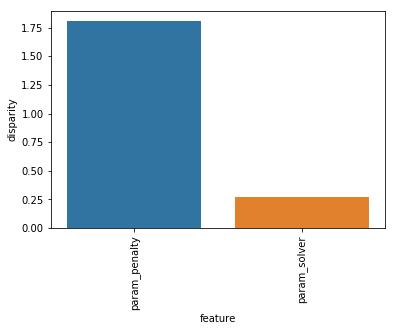

In [314]:
a = anova(data,categorical,'mean_test_score')
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

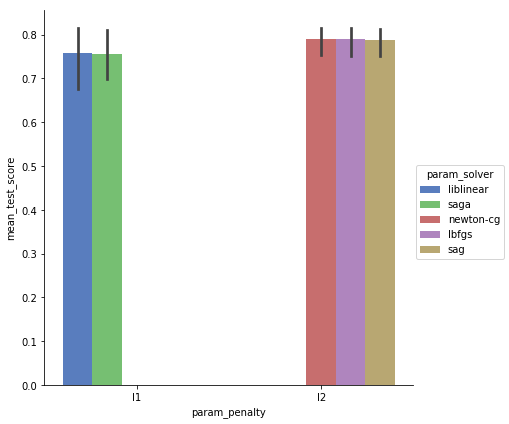

In [315]:
g = sns.factorplot(x="param_penalty", y="mean_test_score", hue="param_solver", data=data,
                   size=6, kind="bar", palette="muted")

In [316]:
data.groupby('param_penalty').mean()

,mean_fit_time,mean_test_score,mean_train_score,param_C,rank_test_score,std_test_score,std_train_score
param_penalty,,,,,,,
l1,0.090305,0.756774,0.764102,158.730143,18.500000,0.024203,0.004573
l2,0.048132,0.790070,0.799215,158.730143,16.142857,0.033565,0.004353


In [317]:
data.groupby('param_solver').mean()

,mean_fit_time,mean_test_score,mean_train_score,param_C,rank_test_score,std_test_score,std_train_score
param_solver,,,,,,,
lbfgs,0.015707,0.790444,0.799055,158.730143,16.000000,0.033163,0.004665
liblinear,0.072423,0.758858,0.765161,158.730143,14.714286,0.024889,0.006276
newton-cg,0.018269,0.791085,0.799167,158.730143,13.714286,0.033437,0.004372
sag,0.110419,0.788680,0.799423,158.730143,18.714286,0.034094,0.004022
saga,0.108187,0.754690,0.763043,158.730143,22.285714,0.023517,0.002869


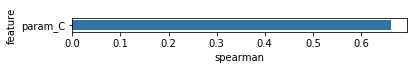

In [73]:
spearman(data,['param_C'],'mean_test_score')

In [318]:
data[data['param_penalty']=='l2'].sort_values('mean_test_score',ascending=False).head(5).describe()

,mean_fit_time,mean_test_score,mean_train_score,param_C,rank_test_score,std_test_score,std_train_score
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.042427,0.816162,0.825387,220.600000,5.400000,0.030699,0.004199
std,0.037850,0.000502,0.001589,437.801667,1.341641,0.004081,0.000694
min,0.019285,0.815937,0.823233,1.000000,3.000000,0.027730,0.003631
25%,0.022944,0.815937,0.824131,1.000000,6.000000,0.027730,0.003750
50%,0.029583,0.815937,0.826487,1.000000,6.000000,0.027730,0.003750
75%,0.030718,0.815937,0.826487,100.000000,6.000000,0.034632,0.004683
max,0.109608,0.817059,0.826599,1000.000000,6.000000,0.035671,0.005182


# RFC

## Data Type 1

### No Deck Predictions

### With Deck Predictions

In [218]:
data = pd.read_csv('./CV_RF_deck_data1.csv',index_col='Unnamed: 0')
data.head().columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_criterion', 'param_max_features',
       'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score',
       'split0_train_score', 'split10_test_score', 'split10_train_score',
       'split1_test_score', 'split1_train_score', 'split2_test_score',
       'split2_train_score', 'split3_test_score', 'split3_train_score',
       'split4_test_score', 'split4_train_score', 'split5_test_score',
       'split5_train_score', 'split6_test_score', 'split6_train_score',
       'split7_test_score', 'split7_train_score', 'split8_test_score',
       'split8_train_score', 'split9_test_score', 'split9_train_score',
       'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

In [219]:
data.drop(['mean_score_time','params','split0_test_score', 'split0_train_score',
       'split10_test_score', 'split10_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time'],axis=1,inplace=True)

In [220]:
numerical = [f for f in data.columns if data.dtypes[f] != 'object']
numerical.remove('mean_test_score')
categorical = [f for f in data.columns if data.dtypes[f] == 'object']

In [221]:
data.fillna('All',inplace=True)

In [222]:
data.sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_criterion,param_max_features,param_n_estimators,rank_test_score,std_test_score,std_train_score
66,0.255478,0.833895,0.983726,gini,All,70,1,0.046832,0.001471
147,0.292832,0.830527,0.984175,entropy,All,80,2,0.051717,0.001373
159,0.765684,0.829405,0.984175,entropy,All,200,3,0.047740,0.001373
64,0.178847,0.828283,0.983614,gini,All,50,4,0.046385,0.001496
79,0.696276,0.828283,0.984175,gini,All,200,4,0.045552,0.001373
148,0.363187,0.827160,0.984175,entropy,All,90,6,0.057076,0.001373
150,0.473232,0.827160,0.984063,entropy,All,110,6,0.044530,0.001337
61,0.126794,0.827160,0.977666,gini,All,20,6,0.043933,0.002317
78,0.712491,0.827160,0.984175,gini,All,190,6,0.041758,0.001373
146,0.272147,0.827160,0.984063,entropy,All,70,6,0.051931,0.001436


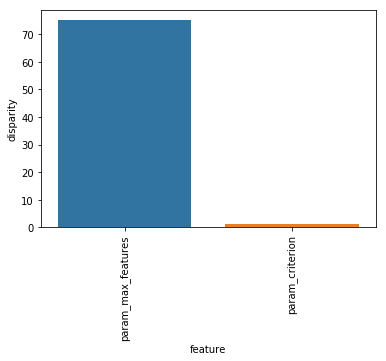

In [223]:
a = anova(data,categorical,'mean_test_score')
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

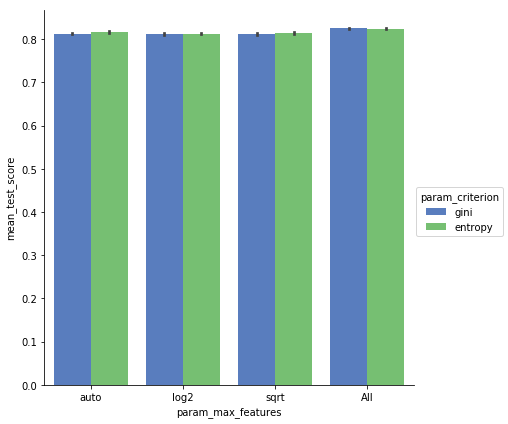

In [224]:
g = sns.factorplot(x="param_max_features", y="mean_test_score", hue="param_criterion", data=data,
                   size=6, kind="bar", palette="muted")

In [225]:
data.groupby('param_max_features').mean()

,mean_fit_time,mean_test_score,mean_train_score,param_n_estimators,rank_test_score,std_test_score,std_train_score
param_max_features,,,,,,,
All,0.393673,0.824944,0.982741,105.0,20.225,0.047942,0.001638
auto,0.333111,0.814590,0.982848,105.0,85.500,0.042961,0.001551
log2,0.330061,0.812626,0.982795,105.0,101.250,0.042922,0.001677
sqrt,0.329475,0.812795,0.982798,105.0,98.225,0.043803,0.001679


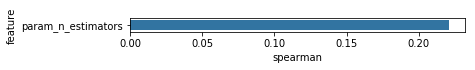

In [226]:
spearman(data,['param_n_estimators'],'mean_test_score')

In [233]:
data[data['param_max_features']=='All'].sort_values('mean_test_score',ascending=False).head(20).describe()

,mean_fit_time,mean_test_score,mean_train_score,param_n_estimators,rank_test_score,std_test_score,std_train_score
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,0.444464,0.827385,0.983715,120.00000,7.900000,0.048161,0.001422
std,0.193285,0.001981,0.001460,54.67608,4.037978,0.004479,0.000223
min,0.126794,0.826038,0.977666,20.00000,1.000000,0.041758,0.001105
25%,0.287661,0.826038,0.984063,77.50000,5.500000,0.044695,0.001373
50%,0.452454,0.827160,0.984175,120.00000,6.000000,0.046910,0.001373
75%,0.590052,0.827441,0.984175,162.50000,12.000000,0.050665,0.001389
max,0.765684,0.833895,0.984175,200.00000,12.000000,0.059327,0.002317


## Data Type 2

### No Deck Predictions

### With Deck Predictions

In [275]:
data = pd.read_csv('./CV_RF_deck_data2.csv',index_col='Unnamed: 0')
data.head().columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_criterion', 'param_max_features',
       'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score',
       'split0_train_score', 'split10_test_score', 'split10_train_score',
       'split1_test_score', 'split1_train_score', 'split2_test_score',
       'split2_train_score', 'split3_test_score', 'split3_train_score',
       'split4_test_score', 'split4_train_score', 'split5_test_score',
       'split5_train_score', 'split6_test_score', 'split6_train_score',
       'split7_test_score', 'split7_train_score', 'split8_test_score',
       'split8_train_score', 'split9_test_score', 'split9_train_score',
       'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

In [276]:
data.drop(['mean_score_time','params','split0_test_score', 'split0_train_score',
       'split10_test_score', 'split10_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time'],axis=1,inplace=True)

In [277]:
numerical = [f for f in data.columns if data.dtypes[f] != 'object']
numerical.remove('mean_test_score')
categorical = [f for f in data.columns if data.dtypes[f] == 'object']

In [278]:
data.fillna('All',inplace=True)

In [279]:
data.sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_criterion,param_max_features,param_n_estimators,rank_test_score,std_test_score,std_train_score
148,0.342421,0.826038,0.988552,entropy,All,90,1,0.047447,0.001403
155,0.776488,0.824916,0.988552,entropy,All,160,2,0.046928,0.001403
153,0.590015,0.824916,0.988552,entropy,All,140,2,0.047805,0.001403
154,0.632292,0.824916,0.988552,entropy,All,150,2,0.048132,0.001403
159,0.969915,0.824916,0.988552,entropy,All,200,2,0.049270,0.001403
156,0.751565,0.823793,0.988552,entropy,All,170,6,0.050731,0.001403
140,0.136405,0.823793,0.971716,entropy,All,10,6,0.046890,0.004066
151,0.560805,0.823793,0.988552,entropy,All,120,6,0.051509,0.001403
77,0.670334,0.823793,0.988552,gini,All,180,6,0.053851,0.001403
158,0.879067,0.822671,0.988552,entropy,All,190,10,0.049641,0.001403


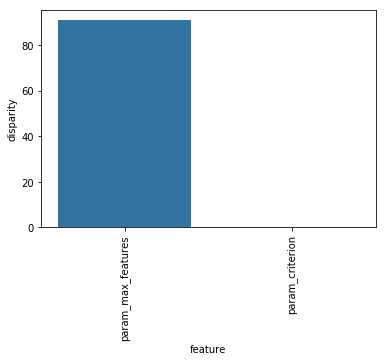

In [280]:
a = anova(data,categorical,'mean_test_score')
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

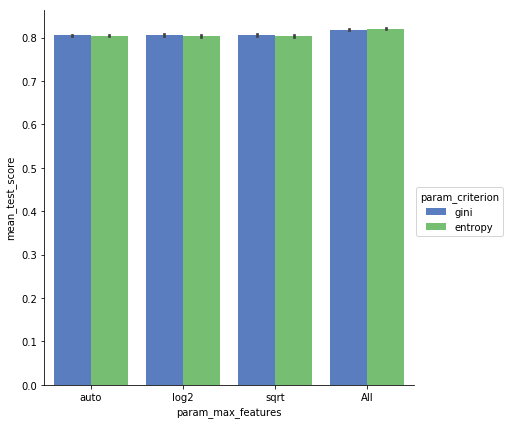

In [281]:
g = sns.factorplot(x="param_max_features", y="mean_test_score", hue="param_criterion", data=data,
                   size=6, kind="bar", palette="muted")

In [282]:
data.groupby('param_max_features').mean()

,mean_fit_time,mean_test_score,mean_train_score,param_n_estimators,rank_test_score,std_test_score,std_train_score
param_max_features,,,,,,,
All,0.444151,0.819613,0.987124,105.0,20.000,0.051272,0.001737
auto,0.333310,0.804714,0.987323,105.0,96.025,0.037536,0.001524
log2,0.332773,0.805022,0.987177,105.0,91.950,0.037536,0.001656
sqrt,0.330772,0.804545,0.987211,105.0,98.950,0.036735,0.001647


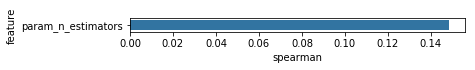

In [283]:
spearman(data,['param_n_estimators'],'mean_test_score')

In [288]:
data[data['param_max_features']=='All'].sort_values('mean_test_score',ascending=False).head(5).describe()

,mean_fit_time,mean_test_score,mean_train_score,param_n_estimators,rank_test_score,std_test_score,std_train_score
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.662226,0.825140,0.988552,148.000000,1.800000,0.047916,0.001403
std,0.232440,0.000502,0.000000,39.623226,0.447214,0.000879,0.000000
min,0.342421,0.824916,0.988552,90.000000,1.000000,0.046928,0.001403
25%,0.590015,0.824916,0.988552,140.000000,2.000000,0.047447,0.001403
50%,0.632292,0.824916,0.988552,150.000000,2.000000,0.047805,0.001403
75%,0.776488,0.824916,0.988552,160.000000,2.000000,0.048132,0.001403
max,0.969915,0.826038,0.988552,200.000000,2.000000,0.049270,0.001403


## Data Type 3

### No Deck Predictions

### With Deck Predictions

In [319]:
data = pd.read_csv('./CV_RF_deck_data3.csv',index_col='Unnamed: 0')
data.head().columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_criterion', 'param_max_features',
       'param_n_estimators', 'params', 'rank_test_score', 'split0_test_score',
       'split0_train_score', 'split10_test_score', 'split10_train_score',
       'split1_test_score', 'split1_train_score', 'split2_test_score',
       'split2_train_score', 'split3_test_score', 'split3_train_score',
       'split4_test_score', 'split4_train_score', 'split5_test_score',
       'split5_train_score', 'split6_test_score', 'split6_train_score',
       'split7_test_score', 'split7_train_score', 'split8_test_score',
       'split8_train_score', 'split9_test_score', 'split9_train_score',
       'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

In [320]:
data.drop(['mean_score_time','params','split0_test_score', 'split0_train_score',
       'split10_test_score', 'split10_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time'],axis=1,inplace=True)

In [321]:
numerical = [f for f in data.columns if data.dtypes[f] != 'object']
numerical.remove('mean_test_score')
categorical = [f for f in data.columns if data.dtypes[f] == 'object']

In [322]:
data.fillna('All',inplace=True)

In [323]:
data.sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_criterion,param_max_features,param_n_estimators,rank_test_score,std_test_score,std_train_score
156,0.749828,0.829405,0.989562,entropy,All,170,1,0.038796,0.001220
74,0.618569,0.829405,0.989562,gini,All,150,1,0.038567,0.001220
155,0.808975,0.828283,0.989562,entropy,All,160,3,0.038294,0.001220
63,0.163194,0.827160,0.987205,gini,All,40,4,0.038773,0.001921
71,0.431432,0.827160,0.989562,gini,All,120,4,0.036121,0.001220
154,0.679456,0.827160,0.989562,entropy,All,150,4,0.032980,0.001220
75,0.685192,0.827160,0.989562,gini,All,160,4,0.038491,0.001220
150,0.494866,0.827160,0.989226,entropy,All,110,4,0.037395,0.001188
73,0.520551,0.826038,0.989450,gini,All,140,9,0.045125,0.001219
149,0.462572,0.826038,0.989562,entropy,All,100,9,0.037485,0.001220


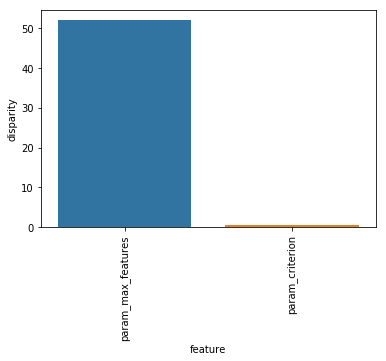

In [324]:
a = anova(data,categorical,'mean_test_score')
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

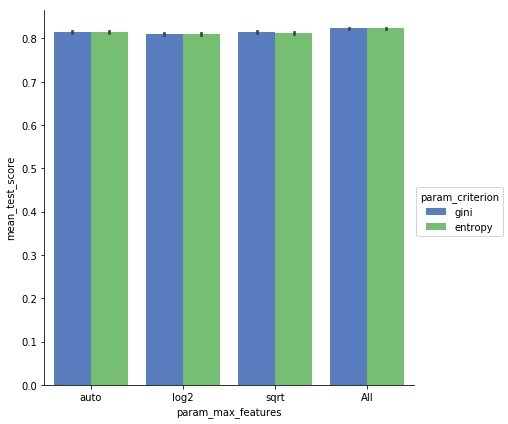

In [325]:
g = sns.factorplot(x="param_max_features", y="mean_test_score", hue="param_criterion", data=data,
                   size=6, kind="bar", palette="muted")

In [326]:
data.groupby('param_max_features').mean()

,mean_fit_time,mean_test_score,mean_train_score,param_n_estimators,rank_test_score,std_test_score,std_train_score
param_max_features,,,,,,,
All,0.450050,0.823148,0.988173,105.0,23.850,0.041061,0.001531
auto,0.337238,0.814983,0.988328,105.0,82.025,0.035641,0.001512
log2,0.325841,0.810494,0.988196,105.0,116.625,0.036399,0.001530
sqrt,0.332727,0.814534,0.988185,105.0,83.650,0.037026,0.001561


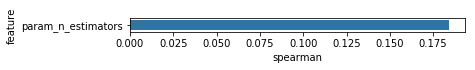

In [327]:
spearman(data,['param_n_estimators'],'mean_test_score')

In [328]:
data[data['param_max_features']=='All'].sort_values('mean_test_score',ascending=False).head(5).describe()

,mean_fit_time,mean_test_score,mean_train_score,param_n_estimators,rank_test_score,std_test_score,std_train_score
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000
mean,0.658799,0.828283,0.989562,152.000000,2.600000,0.038054,0.00122
std,0.145645,0.001122,0.000000,19.235384,1.516575,0.001095,0.00000
min,0.431432,0.827160,0.989562,120.000000,1.000000,0.036121,0.00122
25%,0.618569,0.827160,0.989562,150.000000,1.000000,0.038294,0.00122
50%,0.685192,0.828283,0.989562,160.000000,3.000000,0.038491,0.00122
75%,0.749828,0.829405,0.989562,160.000000,4.000000,0.038567,0.00122
max,0.808975,0.829405,0.989562,170.000000,4.000000,0.038796,0.00122


# KNN

## Data Type 1

### No Deck Predictions

### With Deck Predictions

In [234]:
data = pd.read_csv('./CV_KNN_deck_data1.csv',index_col='Unnamed: 0')
data.head().columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_algorithm', 'param_leaf_size',
       'param_n_neighbors', 'param_p', 'param_weights', 'params',
       'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split10_test_score', 'split10_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

In [235]:
data.drop(['mean_score_time','params','split0_test_score', 'split0_train_score',
       'split10_test_score', 'split10_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time'],axis=1,inplace=True)

In [236]:
numerical = [f for f in data.columns if data.dtypes[f] != 'object']
numerical.remove('mean_test_score')
categorical = [f for f in data.columns if data.dtypes[f] == 'object']

In [237]:
data.sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_algorithm,param_leaf_size,param_n_neighbors,param_p,param_weights,rank_test_score,std_test_score,std_train_score
21402,0.001074,0.819304,0.890124,brute,17,3,2,uniform,1,0.030722,0.003626
3602,0.000949,0.819304,0.888889,ball_tree,39,3,2,uniform,1,0.030722,0.003923
4402,0.000776,0.819304,0.888889,ball_tree,47,3,2,uniform,1,0.030722,0.003923
22402,0.001018,0.819304,0.890124,brute,27,3,2,uniform,1,0.030722,0.003626
22602,0.001232,0.819304,0.890124,brute,29,3,2,uniform,1,0.030722,0.003626
4202,0.000800,0.819304,0.888889,ball_tree,45,3,2,uniform,1,0.030722,0.003923
22802,0.002979,0.819304,0.890124,brute,31,3,2,uniform,1,0.030722,0.003626
23002,0.003344,0.819304,0.890124,brute,33,3,2,uniform,1,0.030722,0.003626
4002,0.000766,0.819304,0.888889,ball_tree,43,3,2,uniform,1,0.030722,0.003923
23202,0.001196,0.819304,0.890124,brute,35,3,2,uniform,1,0.030722,0.003626


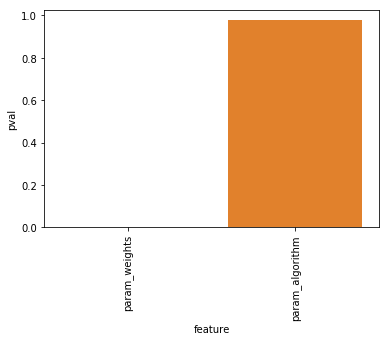

In [238]:
a = anova(data,categorical,'mean_test_score')
a['disparity'] = a['pval'].values#np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='pval')
x=plt.xticks(rotation=90)

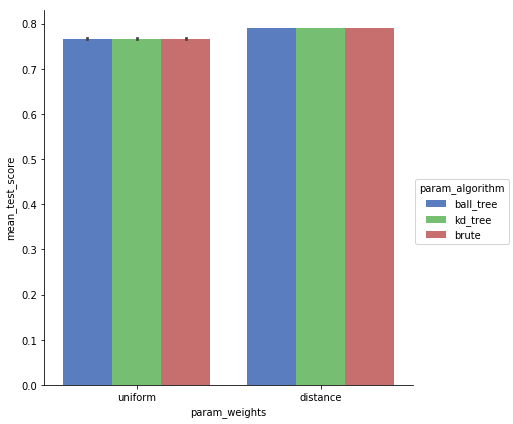

In [239]:
g = sns.factorplot(x="param_weights", y="mean_test_score", hue="param_algorithm", data=data,
                   size=6, kind="bar", palette="muted")

In [240]:
data.groupby('param_weights').mean()

,mean_fit_time,mean_test_score,mean_train_score,param_leaf_size,param_n_neighbors,param_p,rank_test_score,std_test_score,std_train_score
param_weights,,,,,,,,,
distance,0.000938,0.790675,0.984175,52.0,52.0,1.5,10027.984867,0.040599,0.001373
uniform,0.000932,0.766851,0.782266,52.0,52.0,1.5,19298.927267,0.042002,0.006010


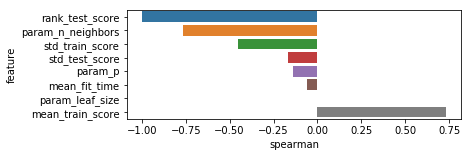

In [241]:
spearman(data,numerical,'mean_test_score')

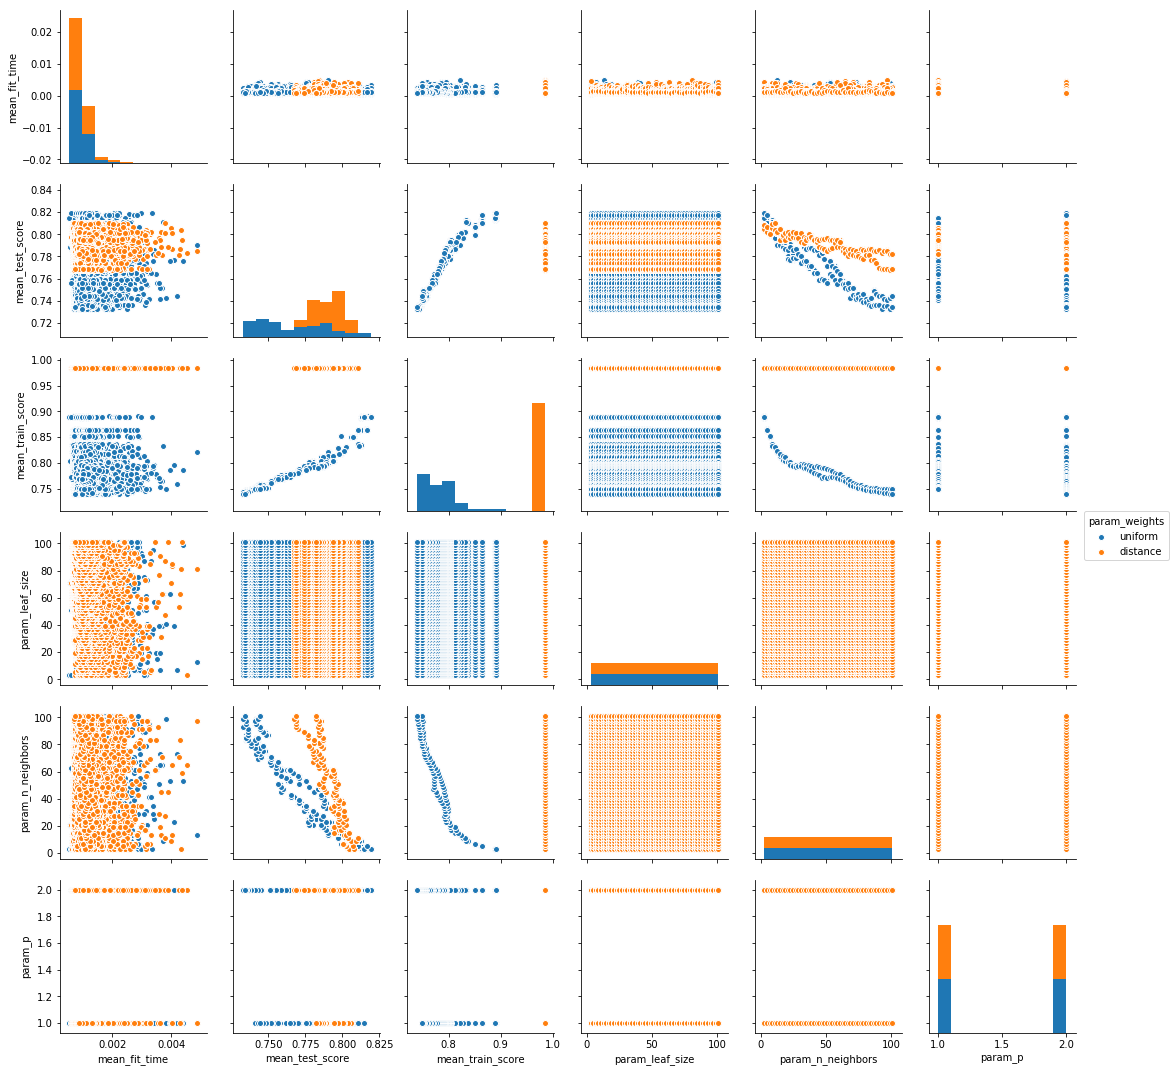

In [242]:
sns.pairplot(data.drop(['rank_test_score','std_test_score','std_train_score'],axis=1), hue="param_weights")

In [243]:
data[data['param_weights']=='distance'].sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_algorithm,param_leaf_size,param_n_neighbors,param_p,param_weights,rank_test_score,std_test_score,std_train_score
16019,0.000666,0.810325,0.984175,kd_tree,63,11,2,distance,625,0.043203,0.001373
12219,0.000823,0.810325,0.984175,kd_tree,25,11,2,distance,625,0.043203,0.001373
20819,0.001210,0.810325,0.984175,brute,11,11,2,distance,625,0.043203,0.001373
11219,0.000814,0.810325,0.984175,kd_tree,15,11,2,distance,625,0.043203,0.001373
26219,0.001198,0.810325,0.984175,brute,65,11,2,distance,625,0.043203,0.001373
11419,0.000822,0.810325,0.984175,kd_tree,17,11,2,distance,625,0.043203,0.001373
11619,0.000810,0.810325,0.984175,kd_tree,19,11,2,distance,625,0.043203,0.001373
20619,0.000856,0.810325,0.984175,brute,9,11,2,distance,625,0.043203,0.001373
26019,0.001873,0.810325,0.984175,brute,63,11,2,distance,625,0.043203,0.001373
11819,0.001590,0.810325,0.984175,kd_tree,21,11,2,distance,625,0.043203,0.001373


In [244]:
data[data['param_weights']=='uniform'].sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_algorithm,param_leaf_size,param_n_neighbors,param_p,param_weights,rank_test_score,std_test_score,std_train_score
1002,0.000889,0.819304,0.888777,ball_tree,13,3,2,uniform,1,0.030722,0.003833
22202,0.001003,0.819304,0.890124,brute,25,3,2,uniform,1,0.030722,0.003626
1602,0.000841,0.819304,0.888777,ball_tree,19,3,2,uniform,1,0.030722,0.003833
1402,0.000849,0.819304,0.888777,ball_tree,17,3,2,uniform,1,0.030722,0.003833
1202,0.000854,0.819304,0.888777,ball_tree,15,3,2,uniform,1,0.030722,0.003833
20002,0.000584,0.819304,0.890124,brute,3,3,2,uniform,1,0.030722,0.003626
20202,0.002042,0.819304,0.890124,brute,5,3,2,uniform,1,0.030722,0.003626
20402,0.001252,0.819304,0.890124,brute,7,3,2,uniform,1,0.030722,0.003626
20602,0.001252,0.819304,0.890124,brute,9,3,2,uniform,1,0.030722,0.003626
20802,0.001365,0.819304,0.890124,brute,11,3,2,uniform,1,0.030722,0.003626


## Data Type 2

### No Deck Predictions

### With Deck Predictions

In [289]:
data = pd.read_csv('./CV_KNN_deck_data2.csv',index_col='Unnamed: 0')
data.head().columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_algorithm', 'param_leaf_size',
       'param_n_neighbors', 'param_p', 'param_weights', 'params',
       'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split10_test_score', 'split10_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

In [290]:
data.drop(['mean_score_time','params','split0_test_score', 'split0_train_score',
       'split10_test_score', 'split10_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time'],axis=1,inplace=True)

In [291]:
numerical = [f for f in data.columns if data.dtypes[f] != 'object']
numerical.remove('mean_test_score')
categorical = [f for f in data.columns if data.dtypes[f] == 'object']

In [292]:
data.sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_algorithm,param_leaf_size,param_n_neighbors,param_p,param_weights,rank_test_score,std_test_score,std_train_score
11402,0.001014,0.808081,0.884063,kd_tree,17,3,2,uniform,1,0.032140,0.005197
11602,0.000952,0.808081,0.884063,kd_tree,19,3,2,uniform,1,0.032140,0.005197
11202,0.000955,0.808081,0.884063,kd_tree,15,3,2,uniform,1,0.032140,0.005197
12002,0.000983,0.808081,0.884063,kd_tree,23,3,2,uniform,1,0.032140,0.005197
11802,0.000992,0.808081,0.884063,kd_tree,21,3,2,uniform,1,0.032140,0.005197
11002,0.000981,0.808081,0.884063,kd_tree,13,3,2,uniform,1,0.032140,0.005197
12202,0.001003,0.808081,0.884063,kd_tree,25,3,2,uniform,1,0.032140,0.005197
21802,0.001494,0.806958,0.884400,brute,21,3,2,uniform,8,0.030325,0.004476
17602,0.000786,0.806958,0.884287,kd_tree,79,3,2,uniform,8,0.030325,0.004470
17202,0.000783,0.806958,0.884287,kd_tree,75,3,2,uniform,8,0.030325,0.004470


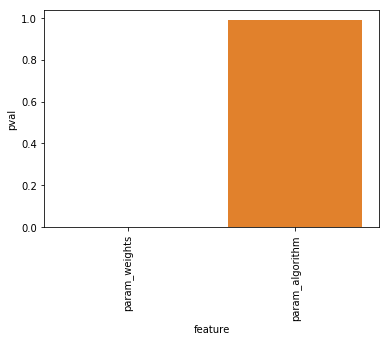

In [293]:
a = anova(data,categorical,'mean_test_score')
a['disparity'] = a['pval'].values#np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='pval')
x=plt.xticks(rotation=90)

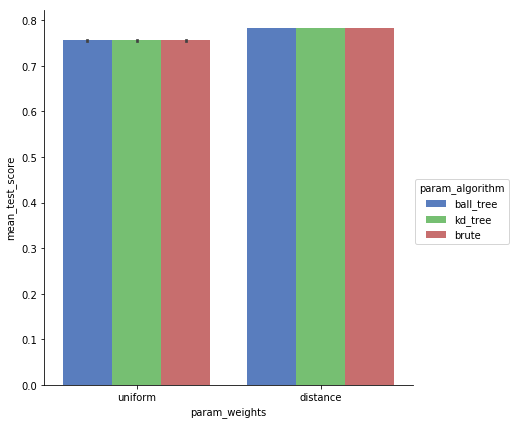

In [294]:
g = sns.factorplot(x="param_weights", y="mean_test_score", hue="param_algorithm", data=data,
                   size=6, kind="bar", palette="muted")

In [295]:
data.groupby('param_weights').mean()

,mean_fit_time,mean_test_score,mean_train_score,param_leaf_size,param_n_neighbors,param_p,rank_test_score,std_test_score,std_train_score
param_weights,,,,,,,,,
distance,0.001120,0.783210,0.988552,52.0,52.0,1.5,9310.838667,0.044642,0.001403
uniform,0.001116,0.755963,0.770676,52.0,52.0,1.5,20044.536067,0.054178,0.005950


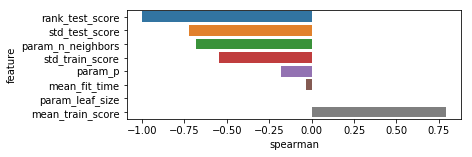

In [296]:
spearman(data,numerical,'mean_test_score')

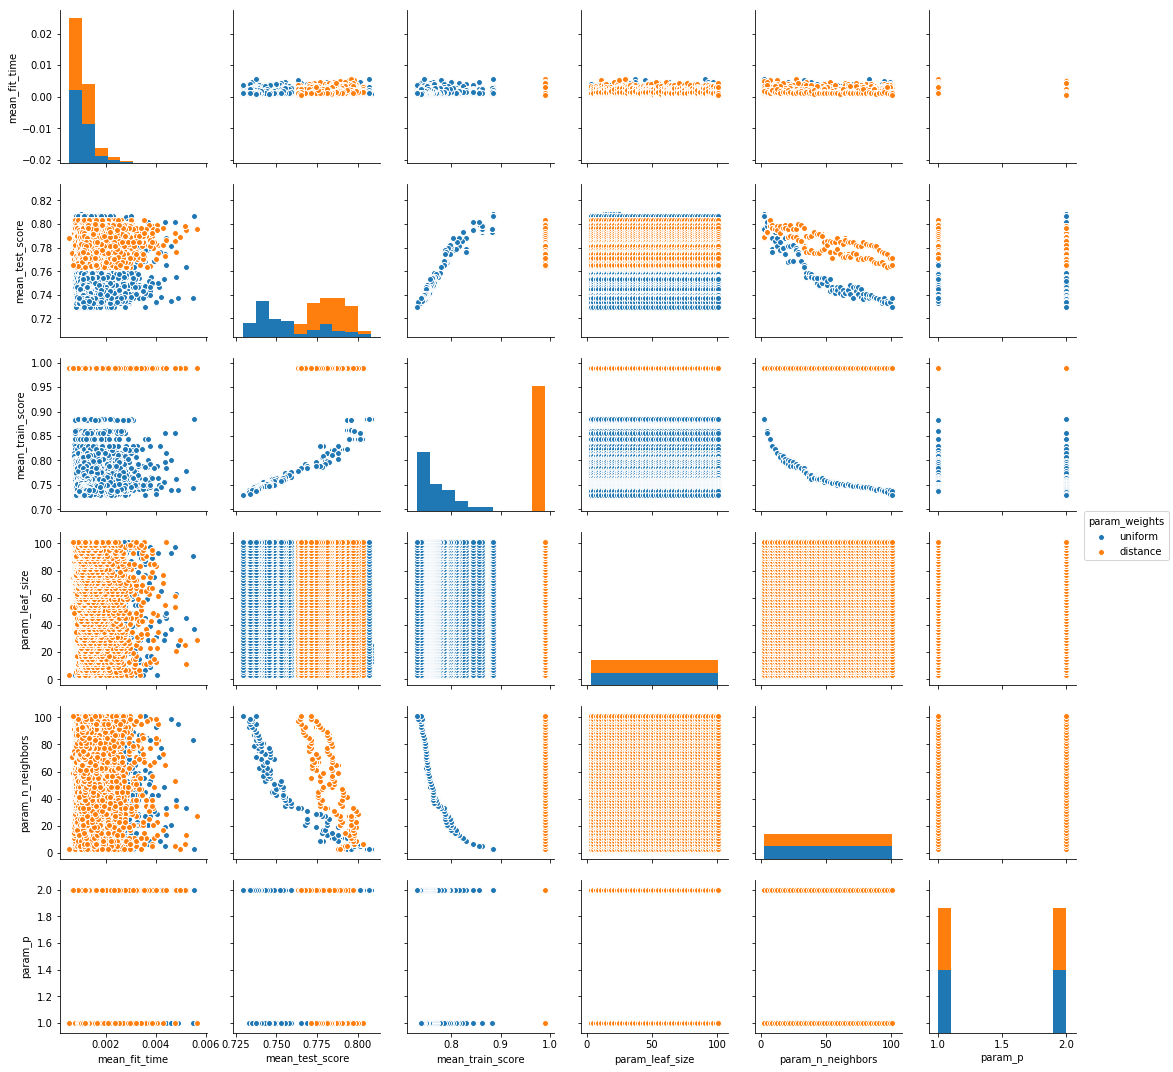

In [297]:
sns.pairplot(data.drop(['rank_test_score','std_test_score','std_train_score'],axis=1), hue="param_weights")

In [143]:
data[data['param_weights']=='distance'].sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_algorithm,param_leaf_size,param_n_neighbors,param_p,param_weights,rank_test_score,std_test_score,std_train_score
18609,0.000777,0.803591,0.988552,kd_tree,89,7,1,distance,151,0.035374,0.001403
18209,0.001757,0.803591,0.988552,kd_tree,85,7,1,distance,151,0.035374,0.001403
23009,0.001229,0.803591,0.988552,brute,33,7,1,distance,151,0.035374,0.001403
25609,0.001088,0.803591,0.988552,brute,59,7,1,distance,151,0.035374,0.001403
6809,0.000859,0.803591,0.988552,ball_tree,71,7,1,distance,151,0.035374,0.001403
29609,0.001344,0.803591,0.988552,brute,99,7,1,distance,151,0.035374,0.001403
9009,0.000800,0.803591,0.988552,ball_tree,93,7,1,distance,151,0.035374,0.001403
14209,0.000870,0.803591,0.988552,kd_tree,45,7,1,distance,151,0.035374,0.001403
23209,0.001671,0.803591,0.988552,brute,35,7,1,distance,151,0.035374,0.001403
18009,0.000784,0.803591,0.988552,kd_tree,83,7,1,distance,151,0.035374,0.001403


In [144]:
data[data['param_weights']=='uniform'].sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_algorithm,param_leaf_size,param_n_neighbors,param_p,param_weights,rank_test_score,std_test_score,std_train_score
11002,0.000981,0.808081,0.884063,kd_tree,13,3,2,uniform,1,0.032140,0.005197
11602,0.000952,0.808081,0.884063,kd_tree,19,3,2,uniform,1,0.032140,0.005197
12202,0.001003,0.808081,0.884063,kd_tree,25,3,2,uniform,1,0.032140,0.005197
11802,0.000992,0.808081,0.884063,kd_tree,21,3,2,uniform,1,0.032140,0.005197
11202,0.000955,0.808081,0.884063,kd_tree,15,3,2,uniform,1,0.032140,0.005197
11402,0.001014,0.808081,0.884063,kd_tree,17,3,2,uniform,1,0.032140,0.005197
12002,0.000983,0.808081,0.884063,kd_tree,23,3,2,uniform,1,0.032140,0.005197
2002,0.000995,0.806958,0.884063,ball_tree,23,3,2,uniform,8,0.030325,0.005147
23602,0.002117,0.806958,0.884400,brute,39,3,2,uniform,8,0.030325,0.004476
24202,0.001549,0.806958,0.884400,brute,45,3,2,uniform,8,0.030325,0.004476


## Data Type 3

### No Deck Predictions

### With Deck Predictions

In [329]:
data = pd.read_csv('./CV_KNN_deck_data3.csv',index_col='Unnamed: 0')
data.head().columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_algorithm', 'param_leaf_size',
       'param_n_neighbors', 'param_p', 'param_weights', 'params',
       'rank_test_score', 'split0_test_score', 'split0_train_score',
       'split10_test_score', 'split10_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time', 'std_test_score', 'std_train_score'],
      dtype='object')

In [330]:
data.drop(['mean_score_time','params','split0_test_score', 'split0_train_score',
       'split10_test_score', 'split10_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time'],axis=1,inplace=True)

In [331]:
numerical = [f for f in data.columns if data.dtypes[f] != 'object']
numerical.remove('mean_test_score')
categorical = [f for f in data.columns if data.dtypes[f] == 'object']

In [332]:
data.sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_algorithm,param_leaf_size,param_n_neighbors,param_p,param_weights,rank_test_score,std_test_score,std_train_score
433,0.001437,0.826038,0.989562,ball_tree,7,19,1,distance,1,0.036969,0.001220
10033,0.001310,0.826038,0.989562,kd_tree,3,19,1,distance,1,0.036969,0.001220
10633,0.001125,0.826038,0.989562,kd_tree,9,19,1,distance,1,0.036969,0.001220
833,0.001243,0.826038,0.989562,ball_tree,11,19,1,distance,1,0.036969,0.001220
633,0.001265,0.826038,0.989562,ball_tree,9,19,1,distance,1,0.036969,0.001220
10433,0.001075,0.826038,0.989562,kd_tree,7,19,1,distance,1,0.036969,0.001220
10233,0.001190,0.826038,0.989562,kd_tree,5,19,1,distance,1,0.036969,0.001220
10833,0.001097,0.826038,0.989562,kd_tree,11,19,1,distance,1,0.036969,0.001220
33,0.001421,0.826038,0.989562,ball_tree,3,19,1,distance,1,0.036969,0.001220
6829,0.000870,0.824916,0.989562,ball_tree,71,17,1,distance,10,0.038209,0.001220


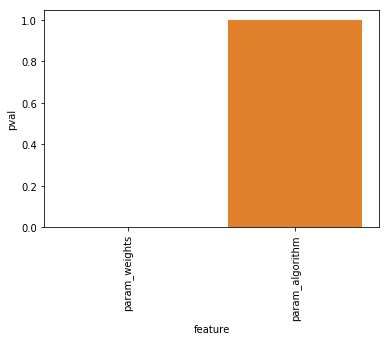

In [333]:
a = anova(data,categorical,'mean_test_score')
a['disparity'] = a['pval'].values#np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='pval')
x=plt.xticks(rotation=90)

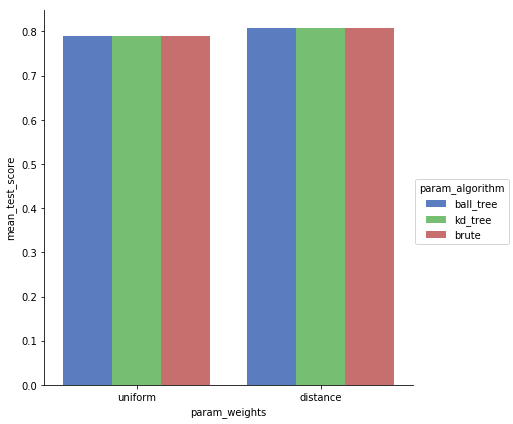

In [334]:
g = sns.factorplot(x="param_weights", y="mean_test_score", hue="param_algorithm", data=data,
                   size=6, kind="bar", palette="muted")

In [335]:
data.groupby('param_weights').mean()

,mean_fit_time,mean_test_score,mean_train_score,param_leaf_size,param_n_neighbors,param_p,rank_test_score,std_test_score,std_train_score
param_weights,,,,,,,,,
distance,0.001276,0.807818,0.989562,52.0,52.0,1.5,9940.395267,0.037781,0.001220
uniform,0.001279,0.789109,0.802719,52.0,52.0,1.5,19271.079467,0.037653,0.005429


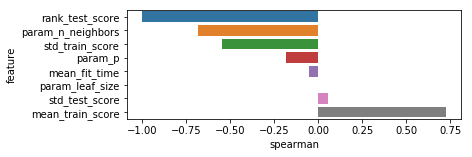

In [336]:
spearman(data,numerical,'mean_test_score')

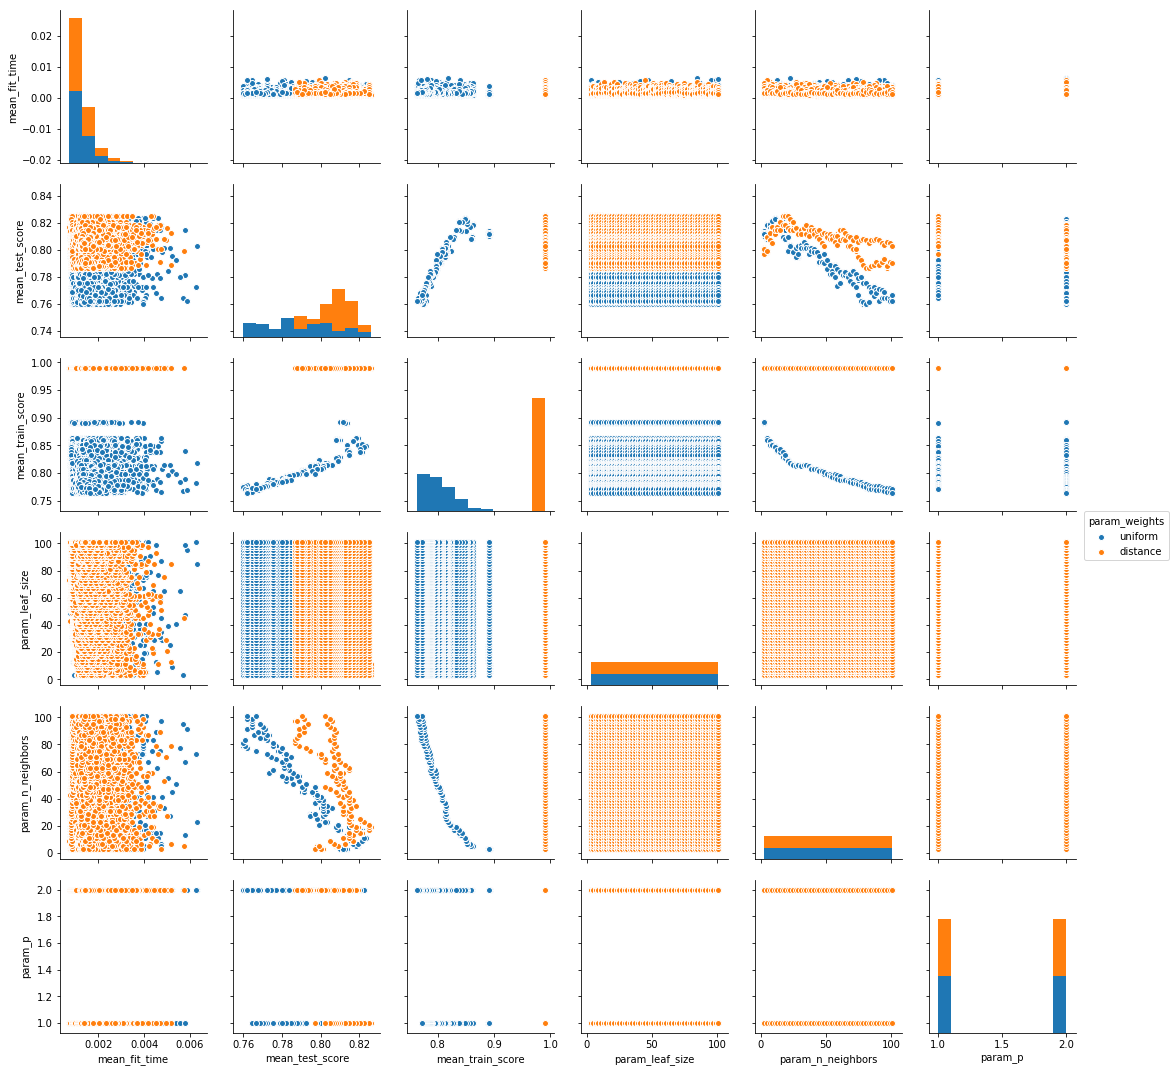

In [337]:
sns.pairplot(data.drop(['rank_test_score','std_test_score','std_train_score'],axis=1), hue="param_weights")

In [338]:
data[data['param_weights']=='distance'].sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_algorithm,param_leaf_size,param_n_neighbors,param_p,param_weights,rank_test_score,std_test_score,std_train_score
10633,0.001125,0.826038,0.989562,kd_tree,9,19,1,distance,1,0.036969,0.00122
10233,0.001190,0.826038,0.989562,kd_tree,5,19,1,distance,1,0.036969,0.00122
833,0.001243,0.826038,0.989562,ball_tree,11,19,1,distance,1,0.036969,0.00122
633,0.001265,0.826038,0.989562,ball_tree,9,19,1,distance,1,0.036969,0.00122
10833,0.001097,0.826038,0.989562,kd_tree,11,19,1,distance,1,0.036969,0.00122
10433,0.001075,0.826038,0.989562,kd_tree,7,19,1,distance,1,0.036969,0.00122
33,0.001421,0.826038,0.989562,ball_tree,3,19,1,distance,1,0.036969,0.00122
10033,0.001310,0.826038,0.989562,kd_tree,3,19,1,distance,1,0.036969,0.00122
433,0.001437,0.826038,0.989562,ball_tree,7,19,1,distance,1,0.036969,0.00122
5037,0.000876,0.824916,0.989562,ball_tree,53,21,1,distance,10,0.040009,0.00122


In [339]:
data[data['param_weights']=='uniform'].sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_algorithm,param_leaf_size,param_n_neighbors,param_p,param_weights,rank_test_score,std_test_score,std_train_score
216,0.001310,0.823793,0.848598,ball_tree,5,11,1,uniform,451,0.035515,0.004241
5616,0.000883,0.823793,0.848598,ball_tree,59,11,1,uniform,451,0.035515,0.004241
6216,0.000857,0.823793,0.848598,ball_tree,65,11,1,uniform,451,0.035515,0.004241
28616,0.001485,0.823793,0.848598,brute,89,11,1,uniform,451,0.035515,0.004241
25016,0.001753,0.823793,0.848598,brute,53,11,1,uniform,451,0.035515,0.004241
16216,0.000826,0.823793,0.848598,kd_tree,65,11,1,uniform,451,0.035515,0.004241
1816,0.001088,0.823793,0.848598,ball_tree,21,11,1,uniform,451,0.035515,0.004241
8416,0.000884,0.823793,0.848598,ball_tree,87,11,1,uniform,451,0.035515,0.004241
22416,0.002321,0.823793,0.848598,brute,27,11,1,uniform,451,0.035515,0.004241
24016,0.001595,0.823793,0.848598,brute,43,11,1,uniform,451,0.035515,0.004241


# SVM

## Data Type 1

### No Deck Predictions

### With Deck Predictions

In [245]:
data = pd.read_csv('./CV_SVM_deck_data1.csv',index_col='Unnamed: 0')
data.head().columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_C', 'param_decision_function_shape',
       'param_degree', 'param_kernel', 'params', 'rank_test_score',
       'split0_test_score', 'split0_train_score', 'split10_test_score',
       'split10_train_score', 'split1_test_score', 'split1_train_score',
       'split2_test_score', 'split2_train_score', 'split3_test_score',
       'split3_train_score', 'split4_test_score', 'split4_train_score',
       'split5_test_score', 'split5_train_score', 'split6_test_score',
       'split6_train_score', 'split7_test_score', 'split7_train_score',
       'split8_test_score', 'split8_train_score', 'split9_test_score',
       'split9_train_score', 'std_fit_time', 'std_score_time',
       'std_test_score', 'std_train_score'],
      dtype='object')

In [246]:
data.drop(['mean_score_time','params','split0_test_score', 'split0_train_score',
       'split10_test_score', 'split10_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time'],axis=1,inplace=True)

In [247]:
numerical = [f for f in data.columns if data.dtypes[f] != 'object']
numerical.remove('mean_test_score')
categorical = [f for f in data.columns if data.dtypes[f] == 'object']

In [248]:
data.fillna(0,inplace=True)

In [249]:
data.sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_C,param_decision_function_shape,param_degree,param_kernel,rank_test_score,std_test_score,std_train_score
183,0.056001,0.831650,0.869361,100.00090,ovr,0.0,rbf,1,0.037451,0.004904
180,0.060854,0.831650,0.869361,100.00090,ovo,0.0,rbf,1,0.037451,0.004904
47,0.069048,0.830527,0.886982,250.00075,ovr,5.0,poly,3,0.032457,0.005380
43,0.072109,0.830527,0.886982,250.00075,ovo,5.0,poly,3,0.032457,0.005380
17,0.052728,0.829405,0.858138,100.00090,ovo,3.0,poly,5,0.034872,0.004240
21,0.064178,0.829405,0.858138,100.00090,ovr,3.0,poly,5,0.034872,0.004240
189,0.066511,0.829405,0.874523,150.00085,ovr,0.0,rbf,5,0.042052,0.003241
186,0.074168,0.829405,0.874523,150.00085,ovo,0.0,rbf,5,0.042052,0.003241
195,0.076131,0.828283,0.876095,200.00080,ovr,0.0,rbf,9,0.040657,0.003610
177,0.044319,0.828283,0.860158,50.00095,ovr,0.0,rbf,9,0.034109,0.004008


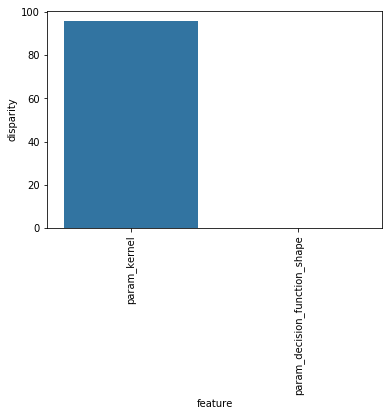

In [252]:
a = anova(data,categorical,'mean_test_score')
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

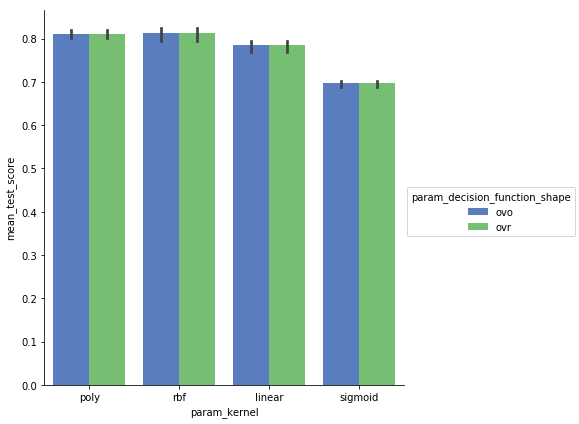

In [253]:
g = sns.factorplot(x="param_kernel", y="mean_test_score", hue="param_decision_function_shape", data=data,
                   size=6, kind="bar", palette="muted")

In [254]:
data.groupby('param_kernel').mean()

,mean_fit_time,mean_test_score,mean_train_score,param_C,param_degree,rank_test_score,std_test_score,std_train_score
param_kernel,,,,,,,,
linear,12.255912,0.786115,0.792443,500.0005,0.0,204.809524,0.028361,0.011046
poly,0.184569,0.811635,0.863616,500.0005,3.5,107.023810,0.032721,0.004546
rbf,0.147200,0.814067,0.872904,500.0005,0.0,71.095238,0.035953,0.004592
sigmoid,0.020247,0.697077,0.705836,500.0005,0.0,259.666667,0.038697,0.007291


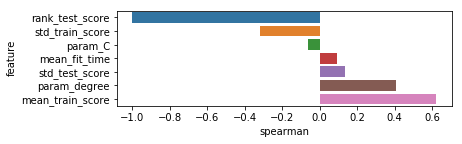

In [255]:
spearman(data,numerical,'mean_test_score')

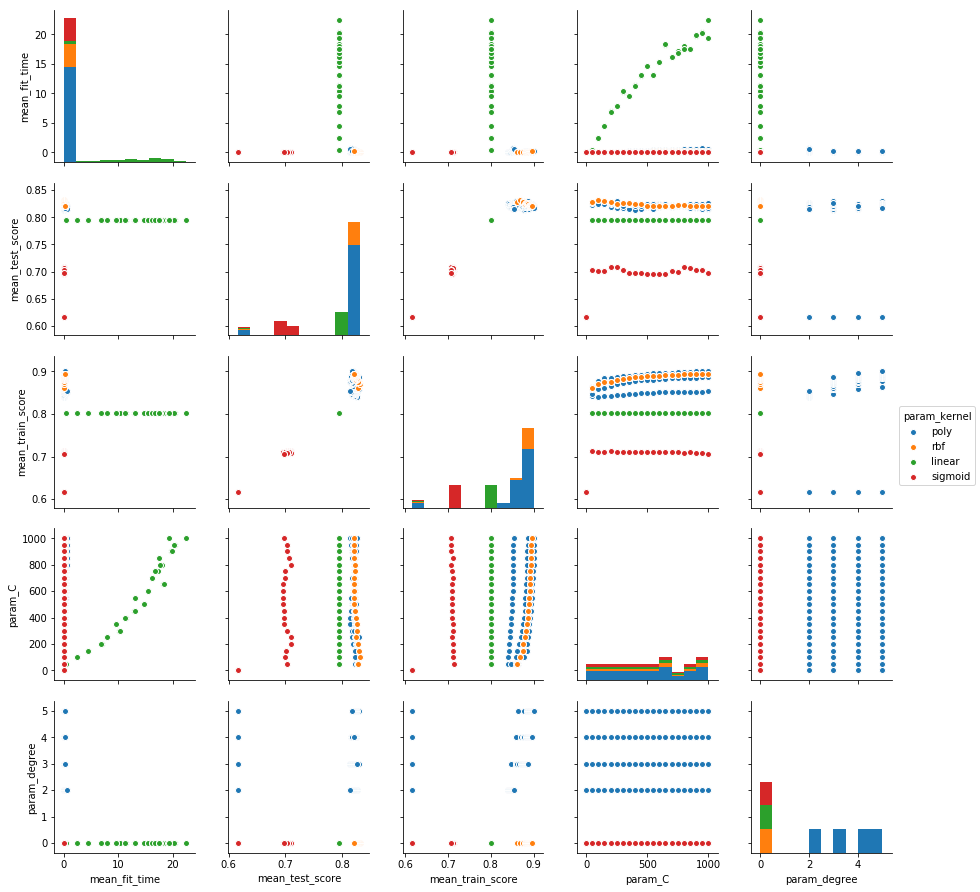

In [256]:
sns.pairplot(data.drop(['rank_test_score','std_test_score','std_train_score'],axis=1), hue="param_kernel")

In [257]:
data[data['param_kernel']=='poly'].sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_C,param_decision_function_shape,param_degree,param_kernel,rank_test_score,std_test_score,std_train_score
47,0.069048,0.830527,0.886982,250.00075,ovr,5.0,poly,3,0.032457,0.005380
43,0.072109,0.830527,0.886982,250.00075,ovo,5.0,poly,3,0.032457,0.005380
21,0.064178,0.829405,0.858138,100.00090,ovr,3.0,poly,5,0.034872,0.004240
17,0.052728,0.829405,0.858138,100.00090,ovo,3.0,poly,5,0.034872,0.004240
165,0.275776,0.827160,0.886533,1000.00000,ovr,3.0,poly,13,0.038068,0.005881
39,0.056944,0.827160,0.885186,200.00080,ovr,5.0,poly,13,0.031621,0.005167
161,0.272520,0.827160,0.886533,1000.00000,ovo,3.0,poly,13,0.038068,0.005881
51,0.080400,0.827160,0.888553,300.00070,ovo,5.0,poly,13,0.027394,0.004421
55,0.075354,0.827160,0.888553,300.00070,ovr,5.0,poly,13,0.027394,0.004421
9,0.040311,0.827160,0.846578,50.00095,ovo,3.0,poly,13,0.036994,0.004402


In [258]:
data[data['param_kernel']=='rbf'].sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_C,param_decision_function_shape,param_degree,param_kernel,rank_test_score,std_test_score,std_train_score
180,0.060854,0.831650,0.869361,100.00090,ovo,0.0,rbf,1,0.037451,0.004904
183,0.056001,0.831650,0.869361,100.00090,ovr,0.0,rbf,1,0.037451,0.004904
186,0.074168,0.829405,0.874523,150.00085,ovo,0.0,rbf,5,0.042052,0.003241
189,0.066511,0.829405,0.874523,150.00085,ovr,0.0,rbf,5,0.042052,0.003241
174,0.045073,0.828283,0.860158,50.00095,ovo,0.0,rbf,9,0.034109,0.004008
177,0.044319,0.828283,0.860158,50.00095,ovr,0.0,rbf,9,0.034109,0.004008
192,0.076517,0.828283,0.876095,200.00080,ovo,0.0,rbf,9,0.040657,0.003610
195,0.076131,0.828283,0.876095,200.00080,ovr,0.0,rbf,9,0.040657,0.003610
210,0.107012,0.827160,0.883614,350.00065,ovo,0.0,rbf,13,0.029543,0.005238
213,0.120712,0.827160,0.883614,350.00065,ovr,0.0,rbf,13,0.029543,0.005238


## Data Type 2

### No Deck Predictions

### With Deck Predictions

In [298]:
data = pd.read_csv('./CV_SVM_deck_data2.csv',index_col='Unnamed: 0')
data.head().columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_C', 'param_decision_function_shape',
       'param_degree', 'param_kernel', 'params', 'rank_test_score',
       'split0_test_score', 'split0_train_score', 'split10_test_score',
       'split10_train_score', 'split1_test_score', 'split1_train_score',
       'split2_test_score', 'split2_train_score', 'split3_test_score',
       'split3_train_score', 'split4_test_score', 'split4_train_score',
       'split5_test_score', 'split5_train_score', 'split6_test_score',
       'split6_train_score', 'split7_test_score', 'split7_train_score',
       'split8_test_score', 'split8_train_score', 'split9_test_score',
       'split9_train_score', 'std_fit_time', 'std_score_time',
       'std_test_score', 'std_train_score'],
      dtype='object')

In [299]:
data.drop(['mean_score_time','params','split0_test_score', 'split0_train_score',
       'split10_test_score', 'split10_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time'],axis=1,inplace=True)

In [300]:
numerical = [f for f in data.columns if data.dtypes[f] != 'object']
numerical.remove('mean_test_score')
categorical = [f for f in data.columns if data.dtypes[f] == 'object']

In [301]:
data.fillna(0,inplace=True)

In [302]:
data.sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_C,param_decision_function_shape,param_degree,param_kernel,rank_test_score,std_test_score,std_train_score
31,0.061853,0.835017,0.900337,150.00085,ovr,5.0,poly,1,0.027332,0.004405
27,0.065088,0.835017,0.900337,150.00085,ovo,5.0,poly,1,0.027332,0.004405
35,0.064943,0.830527,0.903030,200.00080,ovo,5.0,poly,3,0.030670,0.004157
39,0.060663,0.830527,0.903030,200.00080,ovr,5.0,poly,3,0.030670,0.004157
174,0.047903,0.830527,0.880809,50.00095,ovo,0.0,rbf,3,0.026546,0.003015
177,0.044882,0.830527,0.880809,50.00095,ovr,0.0,rbf,3,0.026546,0.003015
14,0.045432,0.828283,0.877779,50.00095,ovr,4.0,poly,7,0.031196,0.004399
51,0.085610,0.828283,0.904377,300.00070,ovo,5.0,poly,7,0.036205,0.003507
55,0.080849,0.828283,0.904377,300.00070,ovr,5.0,poly,7,0.036205,0.003507
19,0.048014,0.828283,0.894165,100.00090,ovo,5.0,poly,7,0.029683,0.003624


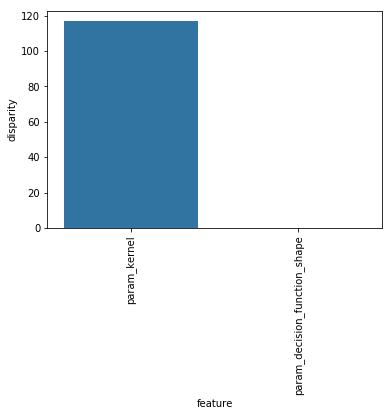

In [303]:
a = anova(data,categorical,'mean_test_score')
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

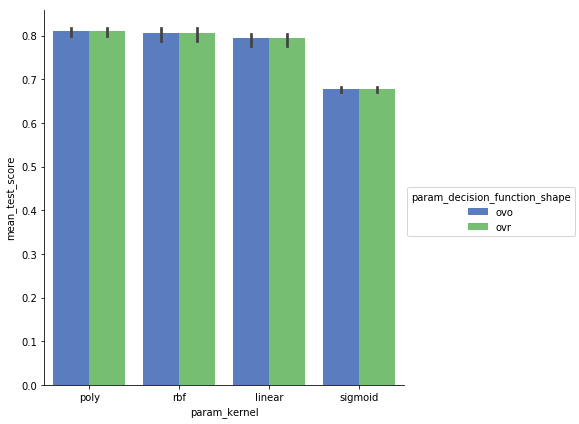

In [304]:
g = sns.factorplot(x="param_kernel", y="mean_test_score", hue="param_decision_function_shape", data=data,
                   size=6, kind="bar", palette="muted")

In [305]:
data.groupby('param_kernel').mean()

,mean_fit_time,mean_test_score,mean_train_score,param_C,param_degree,rank_test_score,std_test_score,std_train_score
param_kernel,,,,,,,,
linear,16.376579,0.794506,0.799519,500.0005,0.0,207.285714,0.029628,0.006369
poly,0.159882,0.809938,0.884024,500.0005,3.5,97.119048,0.033111,0.004209
rbf,0.157070,0.806584,0.890936,500.0005,0.0,136.523810,0.036432,0.004133
sigmoid,0.023611,0.677623,0.683618,500.0005,0.0,258.428571,0.035065,0.008061


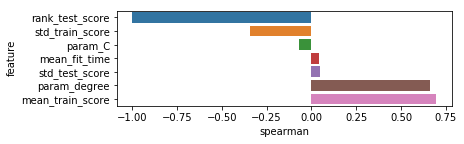

In [306]:
spearman(data,numerical,'mean_test_score')

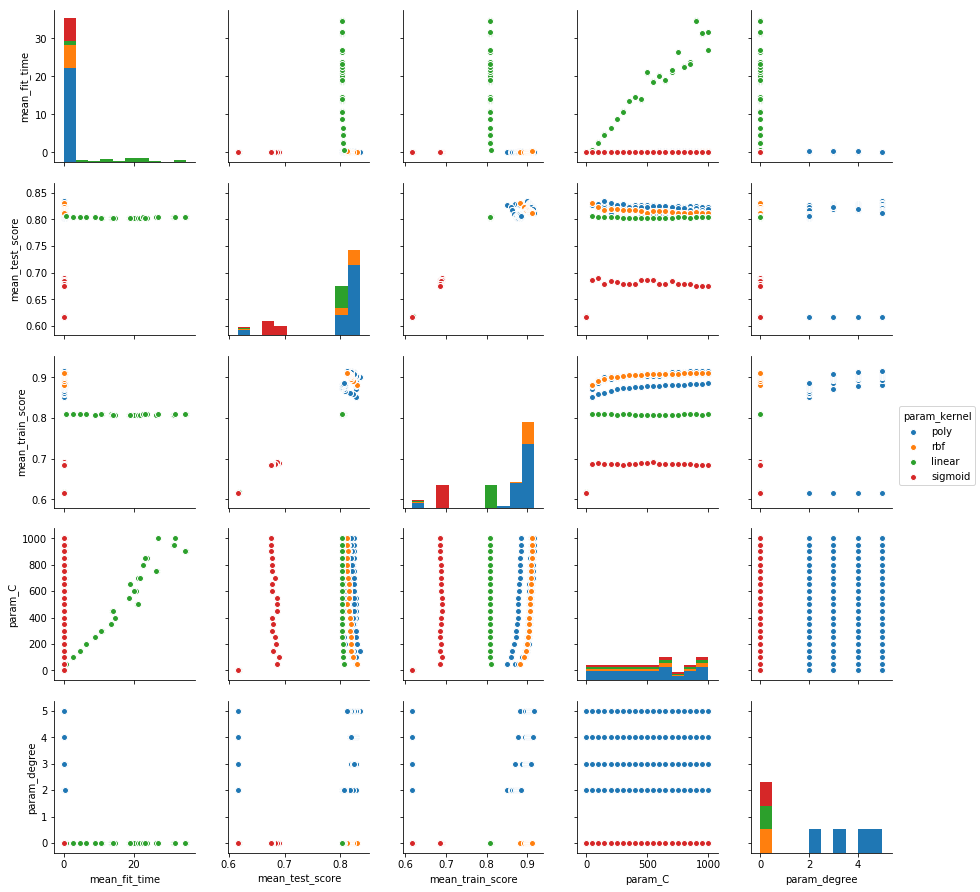

In [307]:
sns.pairplot(data.drop(['rank_test_score','std_test_score','std_train_score'],axis=1), hue="param_kernel")

In [308]:
data[data['param_kernel']=='poly'].sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_C,param_decision_function_shape,param_degree,param_kernel,rank_test_score,std_test_score,std_train_score
27,0.065088,0.835017,0.900337,150.00085,ovo,5.0,poly,1,0.027332,0.004405
31,0.061853,0.835017,0.900337,150.00085,ovr,5.0,poly,1,0.027332,0.004405
35,0.064943,0.830527,0.903030,200.00080,ovo,5.0,poly,3,0.030670,0.004157
39,0.060663,0.830527,0.903030,200.00080,ovr,5.0,poly,3,0.030670,0.004157
13,0.047226,0.828283,0.870707,50.00095,ovr,3.0,poly,7,0.029375,0.003063
10,0.042100,0.828283,0.877779,50.00095,ovo,4.0,poly,7,0.031196,0.004399
19,0.048014,0.828283,0.894165,100.00090,ovo,5.0,poly,7,0.029683,0.003624
14,0.045432,0.828283,0.877779,50.00095,ovr,4.0,poly,7,0.031196,0.004399
23,0.050150,0.828283,0.894165,100.00090,ovr,5.0,poly,7,0.029683,0.003624
51,0.085610,0.828283,0.904377,300.00070,ovo,5.0,poly,7,0.036205,0.003507


In [309]:
data[data['param_kernel']=='rbf'].sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_C,param_decision_function_shape,param_degree,param_kernel,rank_test_score,std_test_score,std_train_score
174,0.047903,0.830527,0.880809,50.00095,ovo,0.0,rbf,3,0.026546,0.003015
177,0.044882,0.830527,0.880809,50.00095,ovr,0.0,rbf,3,0.026546,0.003015
180,0.065736,0.822671,0.891022,100.00090,ovo,0.0,rbf,75,0.029921,0.005855
183,0.070441,0.822671,0.891022,100.00090,ovr,0.0,rbf,75,0.029921,0.005855
192,0.103355,0.819304,0.900112,200.00080,ovo,0.0,rbf,107,0.031637,0.004951
195,0.093615,0.819304,0.900112,200.00080,ovr,0.0,rbf,107,0.031637,0.004951
198,0.099588,0.819304,0.901683,250.00075,ovo,0.0,rbf,107,0.025954,0.004861
201,0.104728,0.819304,0.901683,250.00075,ovr,0.0,rbf,107,0.025954,0.004861
210,0.130379,0.818182,0.904939,350.00065,ovo,0.0,rbf,119,0.032851,0.005207
186,0.069247,0.818182,0.896745,150.00085,ovo,0.0,rbf,119,0.033267,0.006473


## Data Type 3

### No Deck Predictions

### With Deck Predictions

In [340]:
data = pd.read_csv('./CV_SVM_deck_data3.csv',index_col='Unnamed: 0')
data.head().columns

Index(['mean_fit_time', 'mean_score_time', 'mean_test_score',
       'mean_train_score', 'param_C', 'param_decision_function_shape',
       'param_degree', 'param_kernel', 'params', 'rank_test_score',
       'split0_test_score', 'split0_train_score', 'split10_test_score',
       'split10_train_score', 'split1_test_score', 'split1_train_score',
       'split2_test_score', 'split2_train_score', 'split3_test_score',
       'split3_train_score', 'split4_test_score', 'split4_train_score',
       'split5_test_score', 'split5_train_score', 'split6_test_score',
       'split6_train_score', 'split7_test_score', 'split7_train_score',
       'split8_test_score', 'split8_train_score', 'split9_test_score',
       'split9_train_score', 'std_fit_time', 'std_score_time',
       'std_test_score', 'std_train_score'],
      dtype='object')

In [341]:
data.drop(['mean_score_time','params','split0_test_score', 'split0_train_score',
       'split10_test_score', 'split10_train_score', 'split1_test_score',
       'split1_train_score', 'split2_test_score', 'split2_train_score',
       'split3_test_score', 'split3_train_score', 'split4_test_score',
       'split4_train_score', 'split5_test_score', 'split5_train_score',
       'split6_test_score', 'split6_train_score', 'split7_test_score',
       'split7_train_score', 'split8_test_score', 'split8_train_score',
       'split9_test_score', 'split9_train_score', 'std_fit_time',
       'std_score_time'],axis=1,inplace=True)

In [342]:
numerical = [f for f in data.columns if data.dtypes[f] != 'object']
numerical.remove('mean_test_score')
categorical = [f for f in data.columns if data.dtypes[f] == 'object']

In [343]:
data.fillna(0,inplace=True)

In [344]:
data.sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_C,param_decision_function_shape,param_degree,param_kernel,rank_test_score,std_test_score,std_train_score
13,0.036006,0.836139,0.881820,50.00095,ovr,3.0,poly,1,0.025942,0.005014
9,0.036160,0.836139,0.881820,50.00095,ovo,3.0,poly,1,0.025942,0.005014
8,0.041212,0.835017,0.864760,50.00095,ovo,2.0,poly,3,0.023126,0.004769
12,0.041668,0.835017,0.864760,50.00095,ovr,2.0,poly,3,0.023126,0.004769
19,0.042190,0.832772,0.895624,100.00090,ovo,5.0,poly,5,0.038608,0.005232
23,0.049680,0.832772,0.895624,100.00090,ovr,5.0,poly,5,0.038608,0.005232
21,0.068388,0.831650,0.892817,100.00090,ovr,3.0,poly,7,0.035097,0.004173
17,0.059528,0.831650,0.892817,100.00090,ovo,3.0,poly,7,0.035097,0.004173
28,0.070295,0.828283,0.884176,150.00085,ovr,2.0,poly,9,0.036272,0.006575
24,0.079603,0.828283,0.884176,150.00085,ovo,2.0,poly,9,0.036272,0.006575


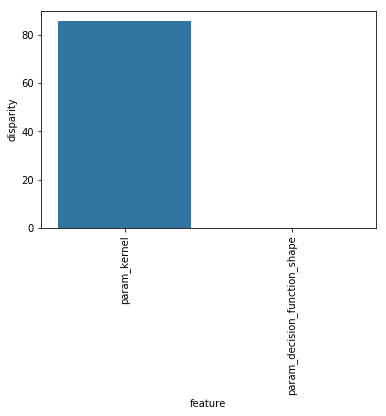

In [345]:
a = anova(data,categorical,'mean_test_score')
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

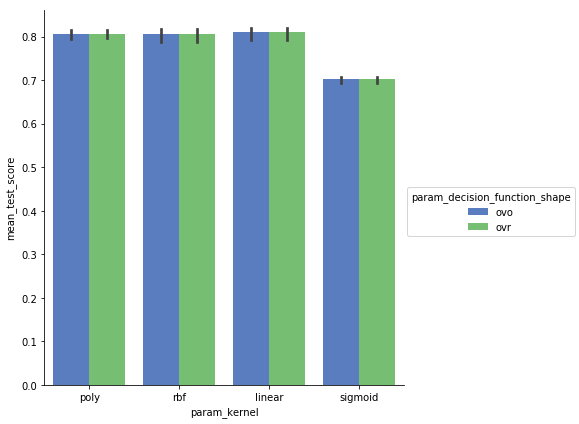

In [346]:
g = sns.factorplot(x="param_kernel", y="mean_test_score", hue="param_decision_function_shape", data=data,
                   size=6, kind="bar", palette="muted")

In [347]:
data.groupby('param_kernel').mean()

,mean_fit_time,mean_test_score,mean_train_score,param_C,param_degree,rank_test_score,std_test_score,std_train_score
param_kernel,,,,,,,,
linear,12.756861,0.810379,0.808157,500.0005,0.0,57.666667,0.031326,0.005959
poly,0.148224,0.806758,0.891213,500.0005,3.5,131.000000,0.036735,0.005623
rbf,0.189364,0.806103,0.896126,500.0005,0.0,131.571429,0.039538,0.004929
sigmoid,0.022523,0.701887,0.708299,500.0005,0.0,257.666667,0.029437,0.005755


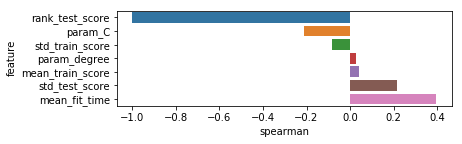

In [348]:
spearman(data,numerical,'mean_test_score')

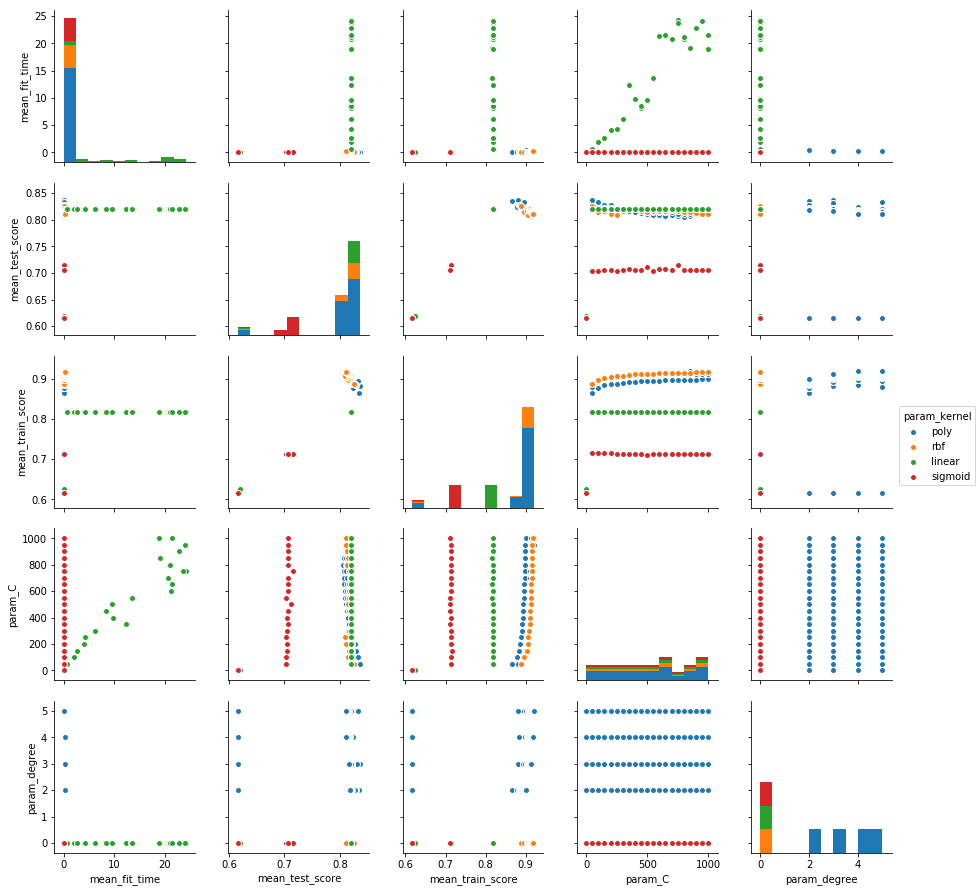

In [349]:
sns.pairplot(data.drop(['rank_test_score','std_test_score','std_train_score'],axis=1), hue="param_kernel")

In [350]:
data[data['param_kernel']=='poly'].sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_C,param_decision_function_shape,param_degree,param_kernel,rank_test_score,std_test_score,std_train_score
13,0.036006,0.836139,0.881820,50.00095,ovr,3.0,poly,1,0.025942,0.005014
9,0.036160,0.836139,0.881820,50.00095,ovo,3.0,poly,1,0.025942,0.005014
12,0.041668,0.835017,0.864760,50.00095,ovr,2.0,poly,3,0.023126,0.004769
8,0.041212,0.835017,0.864760,50.00095,ovo,2.0,poly,3,0.023126,0.004769
19,0.042190,0.832772,0.895624,100.00090,ovo,5.0,poly,5,0.038608,0.005232
23,0.049680,0.832772,0.895624,100.00090,ovr,5.0,poly,5,0.038608,0.005232
17,0.059528,0.831650,0.892817,100.00090,ovo,3.0,poly,7,0.035097,0.004173
21,0.068388,0.831650,0.892817,100.00090,ovr,3.0,poly,7,0.035097,0.004173
28,0.070295,0.828283,0.884176,150.00085,ovr,2.0,poly,9,0.036272,0.006575
24,0.079603,0.828283,0.884176,150.00085,ovo,2.0,poly,9,0.036272,0.006575


In [351]:
data[data['param_kernel']=='rbf'].sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_C,param_decision_function_shape,param_degree,param_kernel,rank_test_score,std_test_score,std_train_score
174,0.051717,0.826038,0.887430,50.00095,ovo,0.0,rbf,13,0.036360,0.003313
177,0.053499,0.826038,0.887430,50.00095,ovr,0.0,rbf,13,0.036360,0.003313
219,0.157782,0.820426,0.910999,400.00060,ovr,0.0,rbf,33,0.042087,0.005524
216,0.168248,0.820426,0.910999,400.00060,ovo,0.0,rbf,33,0.042087,0.005524
210,0.150306,0.819304,0.909877,350.00065,ovo,0.0,rbf,63,0.042104,0.005262
213,0.145808,0.819304,0.909877,350.00065,ovr,0.0,rbf,63,0.042104,0.005262
255,0.240786,0.818182,0.914703,700.00030,ovr,0.0,rbf,85,0.041288,0.004497
252,0.254360,0.818182,0.914703,700.00030,ovo,0.0,rbf,85,0.041288,0.004497
261,0.283752,0.817059,0.914928,750.00025,ovr,0.0,rbf,93,0.042768,0.004343
258,0.287261,0.817059,0.914928,750.00025,ovo,0.0,rbf,93,0.042768,0.004343


In [352]:
data[data['param_kernel']=='linear'].sort_values('mean_test_score',ascending=False)

,mean_fit_time,mean_test_score,mean_train_score,param_C,param_decision_function_shape,param_degree,param_kernel,rank_test_score,std_test_score,std_train_score
232,9.617720,0.820426,0.817285,500.00050,ovr,0.0,linear,33,0.031974,0.005446
214,12.395141,0.820426,0.817285,350.00065,ovr,0.0,linear,33,0.031974,0.005522
250,21.518405,0.820426,0.817061,650.00035,ovr,0.0,linear,33,0.031974,0.005287
247,21.261904,0.820426,0.817061,650.00035,ovo,0.0,linear,33,0.031974,0.005287
244,21.281860,0.820426,0.817285,600.00040,ovr,0.0,linear,33,0.031974,0.005446
241,21.279138,0.820426,0.817285,600.00040,ovo,0.0,linear,33,0.031974,0.005446
238,13.561082,0.820426,0.817061,550.00045,ovr,0.0,linear,33,0.031974,0.005287
235,13.419145,0.820426,0.817061,550.00045,ovo,0.0,linear,33,0.031974,0.005287
259,24.184010,0.820426,0.817173,750.00025,ovo,0.0,linear,33,0.031974,0.005483
229,9.512357,0.820426,0.817285,500.00050,ovo,0.0,linear,33,0.031974,0.005446
